In [166]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.io.wavfile import write, read
import math

In [167]:
def freq_to_note(freq):
    notes = ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"]

    note_number = 12 * math.log2(freq / 440) + 49
    note_number = round(note_number)

    note = (note_number - 1) % len(notes)
    note = notes[note]

    octave = (note_number + 8) // len(notes)

    return note, octave, round(freq)

In [168]:
# fs = 44100  # Sample rate


# signal = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
# sd.wait()

In [169]:
seconds = 6.882  # Duration of recording
a, signal = read("cminor7.wav")  # C Db Bb G con C la nota di frequenza minore
signal = (signal[:, 0] + signal[:, 1]) / 2  # Convert audio to mono
n_samples = signal.shape[0]
dT = seconds / n_samples  # Sample spacing

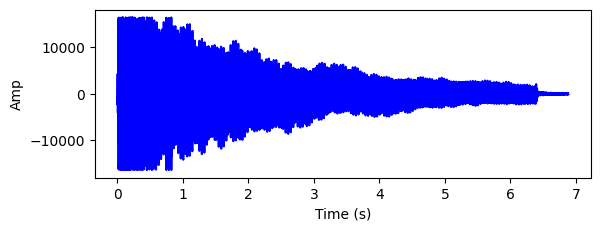

In [170]:
# plot signal versus time
t_array = np.linspace(0, seconds, n_samples)
plt.subplot(2, 1, 1)
plt.plot(t_array, signal, "b-")
plt.ylabel("Amp")
plt.xlabel("Time (s)")
plt.show()

FFT of the signal 

In [171]:
fft_signal = fft(signal)
fft_amp = np.abs(fft_signal)[: n_samples // 2]
fft_freq = fftfreq(n_samples, dT)[: n_samples // 2]

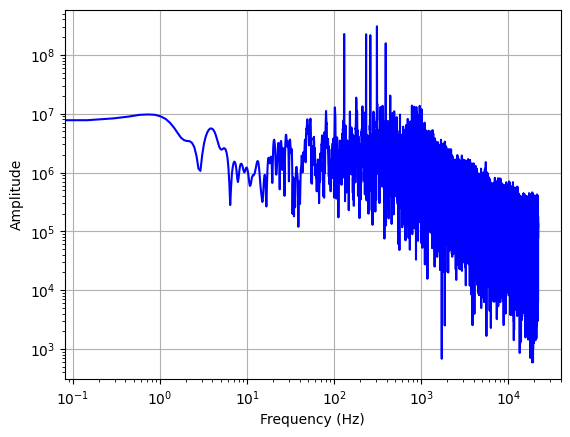

In [172]:
# plotting
fig, ax = plt.subplots()
plt.plot(fft_freq, fft_amp, "b-", label="Audio Signal")
ax.set_xscale("log")
ax.set_yscale("log")
plt.grid()
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")
plt.show()

Peak detection and notes search

In [173]:
n_peaks = 4  # Number of peak to detect
peak_size = 200  # Size in indexes of the peak

peaks_freq = np.empty(n_peaks)
peaks_notes = []

for i in range(0, n_peaks):
    max_index = np.argmax(fft_amp)
    peaks_freq[i] = fft_freq[max_index]
    peaks_notes.append(freq_to_note(peaks_freq[i]))

    fft_amp[
        max_index - peak_size : max_index + peak_size
    ] = 0  # Remove peak from the next max search

print(peaks_notes)

[('D#', 4, 310), ('C', 3, 130), ('A#', 3, 233), ('G', 4, 391)]
